## The LLMs
The fundamental component of LangChain involves invoking an LLM with a specific input. To illustrate this, we'll explore a simple example. Let's imagine we are building a service that suggests personalized workout routines based on an individual's fitness goals and preferences.

To accomplish this, we will first need to import the LLM wrapper.

In [1]:
from langchain.llms import OpenAI

c:\Users\nate.lo\anaconda3\envs\Python39\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.9.9) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


The temperature parameter in OpenAI models manages the randomness of the output. When set to 0, the output is mostly predetermined and suitable for tasks requiring stability and the most probable result. At a setting of 1.0, the output can be inconsistent and interesting but isn't generally advised for most tasks. For creative tasks, a temperature between 0.70 and 0.90 offers a balance of reliability and creativity. The best setting should be determined by experimenting with different values for each specific use case. The code initializes the GPT-3.5 model’s Turbo variant. We will learn more about the various models and their differences later on.

Notes:
Adding the environment variables

https://platform.openai.com/docs/quickstart#:~:text=Right%2Dclick%20on%20'This%20PC,key%20as%20the%20variable%20value.

https://www.immersivelimit.com/tutorials/adding-your-openai-api-key-to-system-environment-variables

Setting up example:
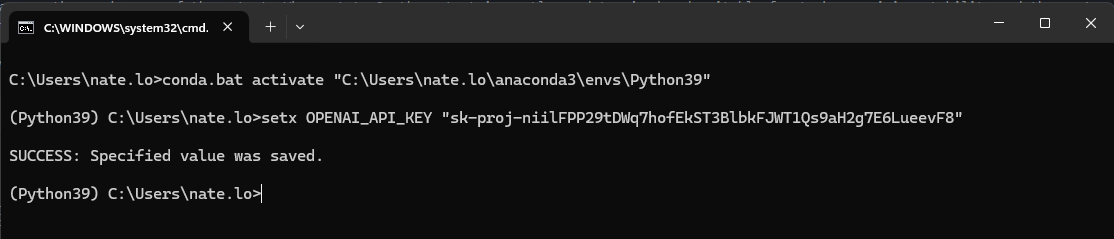

In [4]:


# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.9)

Now we can call it on some input!

In [5]:
text = "Suggest a personalized workout routine for someone looking to improve cardiovascular endurance and prefers outdoor activities."
print(llm(text))

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors..


KeyboardInterrupt: 

This code will generate a personalized workout routine based on the user's fitness goals and preferences using the LLM model:

1) Monday: Jog for 30 minutes outside 
2) Tuesday: 30 minutes of jumping jacks 
3) Wednesday: 30 minutes of running stairs 
4) Thursday: 30 minutes of sprints 
5) Friday: 30 minutes of jogging on an inclined treadmill 
6) Saturday: 30 minutes of interval training 
7) Sunday: Walk for 30 minutes

### The Chains

In LangChain, a chain is an end-to-end wrapper around multiple individual components, providing a way to accomplish a common use case by combining these components in a specific sequence. The most commonly used type of chain is the LLMChain, which consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser.


The LLMChain works as follows:


Takes (multiple) input variables.
Uses the PromptTemplate to format the input variables into a prompt.
Passes the formatted prompt to the model (LLM or ChatModel).
If an output parser is provided, it uses the OutputParser to parse the output of the LLM into a final format.
In the next example, we demonstrate how to create a chain that generates a possible name for a company that produces eco-friendly water bottles. By using LangChain's LLMChain, PromptTemplate, and OpenAIclasses, we can easily define our prompt, set the input variables, and generate creative outputs. 

The sample code:

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain

llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.9)
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain only specifying the input variable.
print(chain.run("eco-friendly water bottles"))

The output:

Eco-Pure Water Bottles.

### The Memory

In LangChain, Memory refers to the mechanism that stores and manages the conversation history between a user and the AI. It helps maintain context and coherency throughout the interaction, enabling the AI to generate more relevant and accurate responses. Memory, such as ConversationBufferMemory, acts as a wrapper around ChatMessageHistory, extracting the messages and providing them to the chain for better context-aware generation.

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferMemory()
)

# Start the conversation
conversation.predict(input="Tell me about yourself.")

# Continue the conversation
conversation.predict(input="What can you do?")
conversation.predict(input="How can you help me with data analysis?")

# Display the conversation
print(conversation)

The output you will observe resembles the following, although the specifics may be different.

**> Entering new ConversationChain chain...**

Prompt after formatting:

***The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Tell me about yourself.
AI:  Hi there! I'm an AI created to help people with their daily tasks. I'm programmed to understand natural language and respond to questions and commands. I'm also able to learn from my interactions with people, so I'm constantly growing and improving. I'm excited to help you out!
Human: What can you do?
AI:  I can help you with a variety of tasks, such as scheduling appointments, setting reminders, and providing information. I'm also able to answer questions about topics like current events, sports, and entertainment. I'm always learning new things, so I'm sure I can help you with whatever you need.
Human: How can you help me with data analysis?
AI:*  I'm not familiar with data analysis, but I'm sure I can help you find the information you need. I can search the web for articles and resources related to data analysis, and I can also provide you with links to helpful websites.**

**> Finished chain.**

In this output, you can see the memory being used by observing the "Current conversation" section. After each input from the user, the conversation is updated with both the user's input and the AI's response. This way, the memory maintains a record of the entire conversation. When the AI generates its next response, it will use this conversation history as context, making its responses more coherent and relevant.


### Deep Lake VectorStore

Deep Lake provides storage for embeddings and their corresponding metadata in the context of LLM apps. It enables hybrid searches on these embeddings and their attributes for efficient data retrieval. It also integrates with LangChain, facilitating the development and deployment of applications.


Deep Lake provides several advantages over the typical vector store:


- It’s multimodal, which means that it can be used to store items of diverse modalities, such as texts, images, audio, and video, along with their vector representations. 
- It’s serverless, which means that we can create and manage cloud datasets without creating and managing a database instance. This aspect gives a great speedup to new projects.
- Last, it’s possible to easily create a data loader out of the data loaded into a Deep Lake dataset. It is convenient for fine-tuning machine learning models using common frameworks like PyTorch and TensorFlow.


In order to use Deep Lake, you first have to register on the Activeloop website and redeem your API token. Here are the steps for doing it:


1. Sign up for an account on Activeloop's platform. You can sign up at Activeloop's website. After specifying your username, click on the “Sign up” button. You should now see your homepage.
2. You should now see a “Create API token” button at the top of your homepage. Click on it, and you’ll get redirected to the “API tokens” page. This is where you can generate, manage, and revoke your API keys for accessing Deep Lake.
3. Click on the "Create API token" button. Then, you should see a popup asking for a token name and an expiration date. By default, the token expiration date is set so that the token expires after one day from its creation, but you can set it further in the future if you want to keep using the same token for the whole duration of the course. Once you’ve set the token name and its expiration date, click on the “Create API token” button.
4. You should now see a green banner saying that the token has been successfully generated, along with your new API token, on the “API tokens” page. To copy your token to your clipboard, click on the square icon on its right.
Now that you have your API token, you can conveniently store under the ACTIVELOOP_TOKEN key in the environment variable to retrieve it automatically by the Deep Lake libraries whenever needed. You can also save the token to its environment variable with Python, like in the following code snippet.

```
import os
os.environ["ACTIVELOOP_TOKEN"] = "<YOUR-ACTIVELOOP-TOKEN>"
```

In [2]:
import os
os.environ["ACTIVELOOP_TOKEN"] = "eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpZCI6InR3bmF0ZWxvIiwiYXBpX2tleSI6InZrMVhnOFYxS2phR0szYTQ1MjlnZ3RTOGJQbnhCbzNFTW9YVjZ2TkhONmJEViJ9."


Please notice that the previous code snippet adds the environment variable only in the context of the current code execution. Therefore, you’d need to run it again for each new Python program you want to run.

If you set your API keys/tokens in your code explicitly, please be careful in doing so, because if another person gets your API key (e.g., by seeing it in a GitHub repository where you uploaded it by mistake), then they can do actions on your behalf, as the API key is associated to your account. Exposing these sensitive credentials directly in the code poses a security risk. In case of a key compromise or a need to revoke access, developers would have to modify and redeploy the code, which can be time-consuming and error-prone.

It's best to store API keys in secure configuration files or use environment variables to keep them separate from the codebase, reducing the risk of accidental exposure and simplifying key management processes.

Let’s install the deeplake library.

~~~
!pip install deeplake
~~~

Set up the environment and load the data. Before executing the following code, save your Activeloop key in the “ACTIVELOOP_TOKEN” environment variable.

In [4]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import DeepLake
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA

# Before executing the following code, make sure to have your
# Activeloop key saved in the “ACTIVELOOP_TOKEN” environment variable.

# instantiate the LLM and embeddings models
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create our documents
texts = [
    "Napoleon Bonaparte was born in 15 August 1769",
    "Louis XIV was born in 5 September 1638"
]
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.create_documents(texts)

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "twnatelo" 
my_activeloop_dataset_name = "langchain_course_from_zero_to_hero"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db.add_documents(docs)

Your Deep Lake dataset has been successfully created!


Creating 2 embeddings in 1 batches of size 2::   0%|          | 0/1 [00:00<?, ?it/s]Retrying langchain.embeddings.openai.embed_with_retry.<locals>._embed_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors..
Retrying langchain.embeddings.openai.embed_with_retry.<locals>._embed_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors..
Retrying langchain.embeddings.openai.embed_with_retry.<locals>._embed_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com

KeyboardInterrupt: 

If everything works correctly, you should see a printed output like this:

Your Deep Lake dataset has been successfully created!
The dataset is private so make sure you are logged in!

If so, you’ve just created your first Deep Lake dataset!

Now, let's create a RetrievalQA chain:

In [ ]:
retrieval_qa = RetrievalQA.from_chain_type(
	llm=llm,
	chain_type="stuff",
	retriever=db.as_retriever()
)

Next, let's create an agent that uses the RetrievalQA chain as a tool:

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType

tools = [
    Tool(
        name="Retrieval QA System",
        func=retrieval_qa.run,
        description="Useful for answering questions."
    ),
]

agent = initialize_agent(
	tools,
	llm,
	agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
	verbose=True
)

Finally, we can use the agent to ask a question:

In [ ]:
response = agent.run("When was Napoleone born?")
print(response)


You should see something similar to the following printed output. Here, the agent used the “Retrieval QA System” tool with the query “When was Napoleone born?” which is then run on our new Deep Lake dataset, returning the most similar document (i.e., the document containing the date of birth of Napoleon). This document is eventually used to generate the final output.

**> Entering new AgentExecutor chain...**

***I need to find out when Napoleone was born.
Action: Retrieval QA System
Action Input: When was Napoleone born?***

Observation:

***Napoleon Bonaparte was born on 15 August 1769.***

Thought:

***I now know the final answer.
Final Answer: Napoleon Bonaparte was born on 15 August 1769.***

**> Finished chain.**

Napoleon Bonaparte was born on 15 August 1769.

This example demonstrates how to use Deep Lake as a vector database and create an agent with a RetrievalQA chain as a tool to answer questions based on the given document.

Let’s add an example of reloading an existing vector store and adding more data.

We first reload an existing vector store from Deep Lake that's located at a specified dataset path. Then, we load new textual data and split it into manageable chunks. Finally, we add these chunks to the existing dataset, creating and storing corresponding embeddings for each added text segment:

In [ ]:
# load the existing Deep Lake dataset and specify the embedding function
db = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# create new documents
texts = [
    "Lady Gaga was born in 28 March 1986",
    "Michael Jeffrey Jordan was born in 17 February 1963"
]
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.create_documents(texts)

# add documents to our Deep Lake dataset
db.add_documents(docs)

We then recreate our previous agent and ask a question that can be answered only by the last documents added.

In [ ]:
# instantiate the wrapper class for GPT3
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)

# create a retriever from the db
retrieval_qa = RetrievalQA.from_chain_type(
	llm=llm, chain_type="stuff", retriever=db.as_retriever()
)

# instantiate a tool that uses the retriever
tools = [
    Tool(
        name="Retrieval QA System",
        func=retrieval_qa.run,
        description="Useful for answering questions."
    ),
]

# create an agent that uses the tool
agent = initialize_agent(
	tools,
	llm,
	agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
	verbose=True
)

Let’s now test our agent with a new question.

In [ ]:
response = agent.run("When was Michael Jordan born?")
print(response)

The printed output will look like the following.

> Entering new AgentExecutor chain...
 I need to find out when Michael Jordan was born.
Action: Retrieval QA System
Action Input: When was Michael Jordan born?

Observation:  Michael Jordan was born on February 17, 1963.
Thought: I now know the final answer.
Final Answer: Michael Jordan was born on February 17, 1963.

> Finished chain.
Michael Jordan was born on February 17, 1963.


The LLM successfully retrieves accurate information by using the power of Deep Lake as a vector store and the OpenAI language model.

### Agents in LangChain
In LangChain, agents are high-level components that use language models (LLMs) to determine which actions to take and in what order. An action can either be using a tool and observing its output or returning it to the user. Tools are functions that perform specific duties, such as Google Search, database lookups, or Python REPL.

Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.

Several types of agents are available in LangChain:

- The zero-shot-react-description agent uses the ReAct framework to decide which tool to employ based purely on the tool's description. It necessitates a description of each tool.
- The react-docstore agent engages with a docstore through the ReAct framework. It needs two tools: a Search tool and a Lookup tool. The Search tool finds a document, and the Lookup tool searches for a term in the most recently discovered document.
- The self-ask-with-search agent employs a single tool named Intermediate Answer, which is capable of looking up factual responses to queries. It is identical to the original self-ask with the search paper, where a Google search API was provided as the tool.
- The conversational-react-description agent is designed for conversational situations. It uses the ReAct framework to select a tool and uses memory to remember past conversation interactions.
In our example, the Agent will use the Google Search tool to look up recent information about the Mars rover and generates a response based on this information.

First, you want to set the environment variables “GOOGLE_API_KEY” and “GOOGLE_CSE_ID” to be able to use Google Search via API. Refer to this article for a guide on how to get them.

Then, let’s import the necessary modules:

- langchain.llms.OpenAI: This is used to create an instance of the OpenAI language model, which can generate human-like text based on the input it's given.
- langchain.agents.load_tools: This function is used to load a list of tools that an AI agent can use.
- langchain.agents.initialize_agent: This function initializes an AI agent that can use a given set of tools and a language model to interact with users.
- langchain.agents.Tool: This is a class used to define a tool that an AI agent can use. A tool is defined by its name, a function that performs the tool's action, and a description of the tool.
- langchain.utilities.GoogleSearchAPIWrapper: This class is a wrapper for the Google Search API, allowing it to be used as a tool by an AI agent. It likely contains a method that sends a search query to Google and retrieves the results.

In [ ]:
from langchain.llms import OpenAI

from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent

from langchain.agents import Tool
from langchain.utilities import GoogleSearchAPIWrapper

We’ll initialize the LLM and set the temperature to 0 for the precise answer. 

In [ ]:
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)

We can now define the Google search wrapper as follow.

In [ ]:
# remember to set the environment variables
# “GOOGLE_API_KEY” and “GOOGLE_CSE_ID” to be able to use
# Google Search via API.
search = GoogleSearchAPIWrapper()

The Tool object represents a specific capability or function the system can use. In this case, it's a tool for performing Google searches.

It is initialized with three parameters:

- name parameter: This is a string that serves as a unique identifier for the tool. In this case, the name of the tool is "google-search.”
- func parameter: This parameter is assigned the function that the tool will execute when called. In this case, it's the run method of the search object, which presumably performs a Google search.
- description parameter: This is a string that briefly explains what the tool does. The description explains that this tool is helpful when you need to use Google to answer questions about current events.

In [ ]:
tools = [
    Tool(
        name = "google-search",
        func=search.run,
        description="useful for when you need to search google to answer questions about current events"
    )
]

Next, we create an agent that uses our Google Search tool:

- initialize_agent(): This function call creates and initializes an agent. An agent is a component that determines which actions to take based on user input. These actions can be using a tool, returning a response to the user, or something else.
- tools:  represents the list of Tool objects that the agent can use.
- agent="zero-shot-react-description": The "zero-shot-react-description" type of an Agent uses the ReAct framework to decide which tool to use based only on the tool's description.
- verbose=True: when set to True, it will cause the Agent to print more detailed information about what it's doing. This is useful for debugging and understanding what's happening under the hood.
- max_iterations=6: sets a limit on the number of iterations the Agent can perform before stopping. It's a way of preventing the agent from running indefinitely in some cases, which may have unwanted monetary costs.

In [ ]:
agent = initialize_agent(tools, 
                         llm, 
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
                         verbose=True,
                         max_iterations=6)

And now, we can check out the response:

In [ ]:
response = agent("What's the latest news about the Mars rover?")
print(response['output'])

You’ll see an output like the following.

> Entering new AgentExecutor chain...
 I need to find out the latest news about the Mars rover
Action: google-search
Action Input: "latest news Mars rover"
Observation: The mission has concluded that the solar-powered lander has run out of energy after more than four years on the Red Planet. Dec 15, 2021 ... Mars Sample Return is going to have great stuff to choose from!” Get the Latest JPL News. SUBSCRIBE TO THE NEWSLETTER. NASA's Curiosity rover is discovering odd rocks halfway into a region called the "clay-bearing unit." ... This panorama of a location called "Teal Ridge" was ... 2 days ago ... LEGO Technic 42158 NASA Mars Rover Perseverance officially revealed as latest real-life space set [News]. Today LEGO has officially revealed ... Oct 19, 2022 ... NASA's Curiosity Mars rover used its Mast Camera, or Mastcam, to capture this panorama of a hill nicknamed ... Get the Latest JPL News. Latest Updates · Curiosity rover finds water-carved 'book' rock on Mars (photo) · Curiosity rover on Mars gets a brain boost to think (and move) faster · Curiosity ... Mar 7, 2023 ... 27, helps provide scientists with information about the particle sizes within the clouds. Sign up for National Breaking News Alerts. Sep 16, 2022 ... Since July, NASA's Perseverance rover has drilled and collected four slim cores of sedimentary rock, formed in what was once a lake on Mars. Nasa Mars lander study reveals 'main source of heat' on Red Planet · NASA/ESA/A. Simon (Goddard Space Flight Center) and M.H. Wong. All the latest content about Nasa Perseverance Mars rover from the BBC. ... James Tytko presents science news and we're putting tuberculosis under the ...
Thought: I now know the final answer
Final Answer: The latest news about the Mars rover is that the mission has concluded that the solar-powered lander has run out of energy after more than four years on the Red Planet. NASA's Curiosity rover is discovering odd rocks halfway into a region called the "clay-bearing unit." LEGO Technic 42158 NASA Mars Rover Perseverance has been officially revealed as the latest real-life space set. NASA's Curiosity Mars rover used its Mast Camera, or Mastcam, to capture a panorama of a hill nicknamed "Teal Ridge." NASA's Perseverance rover has drilled and collected four slim cores of sedimentary rock, formed in what was once a lake on Mars. A study of the Mars lander has revealed the 'main source of heat' on the Red Planet.

> Finished chain.
The latest news about the Mars rover is that the mission has concluded that the solar-powered lander has run out of energy after more than four years on the Red Planet. NASA's Curiosity rover is discovering odd rocks halfway into a region called the "clay-bearing unit." LEGO Technic 42158 NASA Mars Rover Perseverance has been officially revealed as the latest real-life space set. NASA's Curiosity Mars rover used its Mast Camera, or Mastcam, to capture a panorama of a hill nicknamed "Teal Ridge." NASA's Perseverance rover has drilled and collected four slim cores of sedimentary rock, formed in what was once a lake on Mars. A study of the Mars lander has revealed the 'main source of heat' on the Red Planet.

In summary, Agents in LangChain help decide which actions to take based on user input. The example demonstrates initializing and using a "zero-shot-react-description" agent with a Google search tool.

### Tools in LangChain

LangChain provides a variety of tools for agents to interact with the outside world. These tools can be used to create custom agents that perform various tasks, such as searching the web, answering questions, or running Python code. In this section, we will discuss the different tool types available in LangChain and provide examples of creating and using them.

In our example, two tools are being defined for use within a LangChain agent: a Google Search tool and a Language Model tool acting specifically as a text summarizer. The Google Search tool, using the GoogleSearchAPIWrapper, will handle queries that involve finding recent event information. The Language Model tool leverages the capabilities of a language model to summarize texts. These tools are designed to be used interchangeably by the agent, depending on the nature of the user's query.

Let’s import the necessary libraries.

In [ ]:
from langchain.llms import OpenAI
from langchain.agents import Tool
from langchain.utilities import GoogleSearchAPIWrapper
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType

We then instantiate a  LLMChain specifically for text summarization.

In [ ]:
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)

prompt = PromptTemplate(
    input_variables=["query"],
    template="Write a summary of the following text: {query}"
)

summarize_chain = LLMChain(llm=llm, prompt=prompt)

Next, we create the tools that our agent will use.

In [ ]:
# remember to set the environment variables
# “GOOGLE_API_KEY” and “GOOGLE_CSE_ID” to be able to use
# Google Search via API.
search = GoogleSearchAPIWrapper()

tools = [
    Tool(
        name="Search",
        func=search.run,
        description="useful for finding information about recent events"
    ),
    Tool(
       name='Summarizer',
       func=summarize_chain.run,
       description='useful for summarizing texts'
    )
]


We are now ready to create our agent that leverages two tools.

In [ ]:
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True  
)

Let’s run the agent with a question about summarizing the latest news about the Mars rover.

In [ ]:
response = agent("What's the latest news about the Mars rover? Then please summarize the results.")
print(response['output'])

You should see an output like the following.

> Entering new AgentExecutor chain...
 I should search for recent news about the Mars rover and then summarize the results.
Action: Search
Action Input: Latest news about the Mars rover
Observation: Mars 2020 Perseverance Rover · The largest and most capable rover ever sent to Mars. ... Curiosity Rover · Measures Mars' atmosphere to understand its climate ... Dec 15, 2021 ... Mars Sample Return is going to have great stuff to choose from!” Get the Latest JPL News. SUBSCRIBE TO THE NEWSLETTER. The mission has concluded that the solar-powered lander has run out of energy after more than four years on the Red Planet. Oct 19, 2022 ... NASA's Curiosity Mars rover used its Mast Camera, or Mastcam, to capture this panorama of a hill nicknamed ... Get the Latest JPL News. NASA's Mars 2020 Perseverance rover will look for signs of past microbial life, cache rock and soil samples, and prepare for future human exploration. Latest Updates · Curiosity rover finds water-carved 'book' rock on Mars (photo) · Curiosity rover on Mars gets a brain boost to think (and move) faster · Curiosity ... Feb 8, 2023 ... Curiosity Rover Finds New Clues to Mars' Watery Past ... at Gediz Vallis Ridge twice last year but could only survey it from a distance. Sep 16, 2022 ... Since July, NASA's Perseverance rover has drilled and collected four slim cores of sedimentary rock, formed in what was once a lake on Mars. Mar 7, 2023 ... 27, helps provide scientists with information about the particle sizes within the clouds. Sign up for National Breaking News Alerts. All the latest content about Nasa Perseverance Mars rover from the BBC. ... James Tytko presents science news and we're putting tuberculosis under the ...
Thought: I should summarize the results of the search.
Action: Summarizer
Action Input: Mars 2020 Perseverance Rover is the largest and most capable rover ever sent to Mars. It measures Mars' atmosphere to understand its climate and has run out of energy after more than four years on the Red Planet. NASA's Curiosity Mars rover used its Mast Camera to capture a panorama of a hill nicknamed "Book Rock". NASA's Mars 2020 Perseverance rover will look for signs of past microbial life, cache rock and soil samples, and prepare for future human exploration. Curiosity rover finds water-carved 'book' rock on Mars, Curiosity rover on Mars gets a brain boost to think (and move) faster, Curiosity Rover Finds New Clues to Mars' Watery Past, and NASA's Perseverance rover has drilled and collected four slim cores of sedimentary rock.
Observation: 

NASA's Mars 2020 Perseverance rover is the largest and most capable rover ever sent to Mars. It has been on the Red Planet for more than four years, measuring the atmosphere to understand its climate and searching for signs of past microbial life. The Curiosity rover has captured a panorama of a hill nicknamed "Book Rock" and has been given a brain boost to think and move faster. It has also found new clues to Mars' watery past. The Perseverance rover has drilled and collected four slim cores of sedimentary rock, which will be used to cache rock and soil samples and prepare for future human exploration.
Thought: I now know the final answer.
Final Answer: NASA's Mars 2020 Perseverance rover is the largest and most capable rover ever sent to Mars. It has been on the Red Planet for more than four years, measuring the atmosphere to understand its climate and searching for signs of past microbial life. The Curiosity rover has captured a panorama of a hill nicknamed "Book Rock" and has been given a brain boost to think and move faster. It has also found new clues to Mars' watery past. The Perseverance rover has drilled and collected four slim cores of sedimentary rock, which will be used to cache rock and soil samples and prepare for future human exploration.

> Finished chain.
NASA's Mars 2020 Perseverance rover is the largest and most capable rover ever sent to Mars. It has been on the Red Planet for more than four years, measuring the atmosphere to understand its climate and searching for signs of past microbial life. The Curiosity rover has captured a panorama of a hill nicknamed "Book Rock" and has been given a brain boost to think and move faster. It has also found new clues to Mars' watery past. The Perseverance rover has drilled and collected four slim cores of sedimentary rock, which will be used to cache rock and soil samples and prepare for future human exploration.

Notice how the agents used at first the “Search” tool to look for recent information about the Mars rover and then used the “Summarizer” tool for writing a summary.

LangChain provides an expansive toolkit that integrates various functions to improve the functionality of conversational agents. Here are some examples:

- SerpAPI: This tool is an interface for the SerpAPI search engine, allowing the agent to perform robust online searches to pull in relevant data for a conversation or task.
- PythonREPLTool: This unique tool enables the writing and execution of Python code within an agent. This opens up a wide range of possibilities for advanced computations and interactions within the conversation.
If you wish to add more specialized capabilities to your LangChain conversational agent, the platform offers the flexibility to create custom tools. By following the general tool creation guidelines provided in the LangChain documentation, you can develop tools tailored to the specific needs of your application.

### Conclusion
As we conclude our comprehensive exploration of LangChain, it's clear that this toolset presents a remarkable opportunity for both novice and seasoned AI developers. Through our journey, we've unpacked key concepts, from library installation to configuring OpenAI credentials, and dove into the intricacies of generating predictions using language models.

Whether you're just starting with LangChain or looking to enhance your existing AI workflow, we hope this exploration has provided you with a solid foundation to build upon.

For a more in-depth explanation of all the LangChain concepts and several projects examples with it, consider taking the full course, starting with the lesson on large language models. Happy coding!